In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

In [47]:
class Perceptron:
    #eta is the learning rate
    def __init__(self,eta: float=None, epoches: int=None):
        self.weights = np.random.randn(3) * 1e-4
        training = eta is not None and (epoches is not None)
        if training:
            print(f"initial weights before training\n{self.weights}")
        self.eta=eta
        self.epoches=epoches        
        
    def _z_outcome(self,inputs,weights):
        return np.dot(inputs,weights)
    
    def activation_function(self,z):
        return np.where(z>0,1,0)
    
    def fit(self,X,y):
        self.X=X
        self.y=y
        
        #c_ means conatenation
        X_with_bias = np.c_[self.X,-np.ones((len(self.X),1))]
        print(f"X with bias :\n{X_with_bias}")
        
        for epoch in range(self.epoches):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias,self.weights)
            #y_hat means predicted value
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass :\n{y_hat}")
            
            self.error =self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights=self.weights+self.eta * np.dot(X_with_bias.T,self.error)
            print(f"updated weights after epoch : {epoch+1}/{self.epoches}:\n{self.weights}")
            print('##'*10)
        
    
    def predict(self,X):
        X_with_bias = np.c_[X,-np.ones((len(X),1))]
        z = self._z_outcome(X_with_bias,self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"total loss: {total_loss}\n")
        return total_loss

    def _create_dir_return_path(self,model_dir,filename):
        os.makedirs(model_dir,exist_ok=True)
        return os.path.join(model_dir,filename)
    
    def save(self,filename,model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir,filename)
            joblib.dump(self,model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model",filename)
            joblib.dump(self,model_file_path)
    def load(self,filepath):
        return joblib.load(filepath)
    
    

In [48]:
def prepare_data(df,target_col="y"):
    X=df.drop(target_col,axis=1)
    y=df[target_col]
    return X,y

In [49]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,0,0,1]
}

df_AND = pd.DataFrame(AND)

df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [50]:
X,y = prepare_data(df_AND)
ETA=0.1
EPOCHES=10
model_and=Perceptron(eta=ETA,epoches=EPOCHES)
model_and.fit(X,y)
_ = model_and.total_loss()





initial weights before training
[ 2.62171729e-05  2.01049455e-04 -1.17442364e-04]
X with bias :
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass :
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch : 1/10:
[-0.09997378 -0.09979895  0.29988256]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass :
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch : 2/10:
[2.62171729e-05 2.01049455e-04 1.99882558e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass :
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch : 3/10:
[0.10002622 0.10020105 0.09988256]
####################
--------------------
for epoch >> 3
--------------------
predicted

In [51]:
model_and.save(filename="and.model")

In [52]:
reload_and = Perceptron().load(filepath="model/and.model")

In [53]:
reload_and.predict(X=[[1,0]])

array([0])

In [54]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1]
}

df_OR = pd.DataFrame(OR)

df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [55]:
X,y = prepare_data(df_OR)
ETA=0.1
EPOCHES=10
model_or=Perceptron(eta=ETA,epoches=EPOCHES)
model_or.fit(X,y)
_ = model_and.total_loss()

initial weights before training
[-1.46701457e-04  1.21510577e-04  9.97509151e-06]
X with bias :
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass :
[0 1 0 0]
error: 
0    0
1    0
2    1
3    1
Name: y, dtype: int64
updated weights after epoch : 1/10:
[ 0.1998533   0.10012151 -0.19999002]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass :
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch : 2/10:
[ 0.1998533   0.10012151 -0.09999002]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass :
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch : 3/10:
[1.99853299e-01 1.00121511e-01 9.97509151e-06]
####################
--------------------
for epoch >> 3
--------------------
predic

In [56]:
model_or.save(filename="or.model")

In [57]:
reload_or = Perceptron().load(filepath="model/or.model")

In [58]:
reload_or.predict(X=[[1,0]])

array([1])

In [59]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)

df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [60]:
X,y = prepare_data(df_XOR)
ETA=0.1
EPOCHES=10
model_xor=Perceptron(eta=ETA,epoches=EPOCHES)
model_xor.fit(X,y)
_ = model_xor.total_loss()

initial weights before training
[4.95731447e-05 2.05170212e-04 1.54102428e-04]
X with bias :
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass :
[0 1 0 1]
error: 
0    0
1    0
2    1
3   -1
Name: y, dtype: int64
updated weights after epoch : 1/10:
[ 4.95731447e-05 -9.97948298e-02  1.54102428e-04]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass :
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch : 2/10:
[ 0.10004957  0.00020517 -0.1998459 ]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass :
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch : 3/10:
[ 4.95731447e-05 -9.97948298e-02  1.54102428e-04]
####################
--------------------
for epoch >> 3
---------------

In [61]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()#get current figure
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

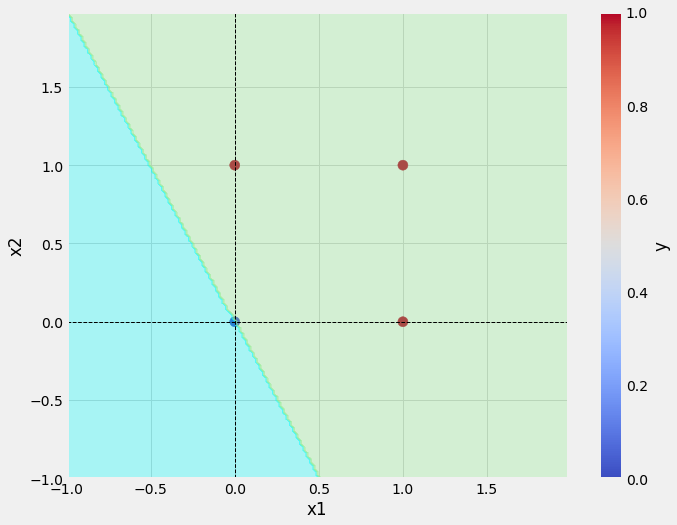

In [62]:
save_plot(df_OR, model_or, filename="or.png")

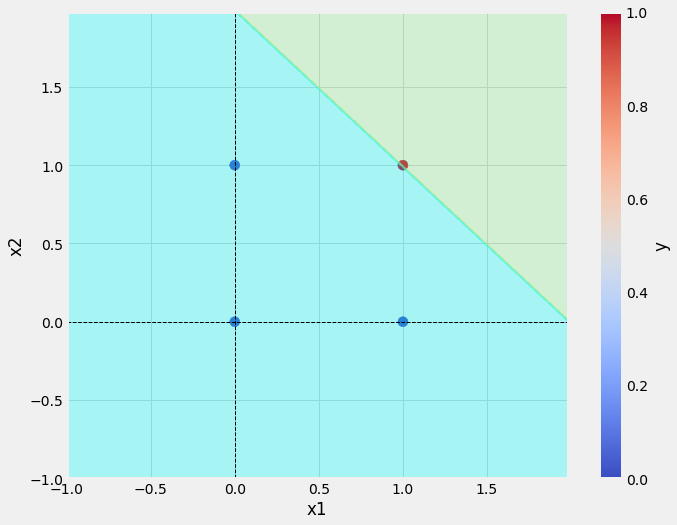

In [63]:
save_plot(df_AND, model_and, filename="and.png")

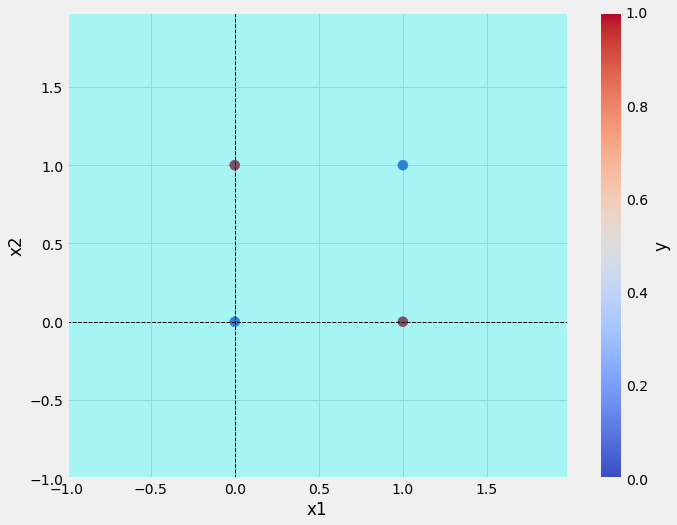

In [64]:
save_plot(df_XOR, model_xor, filename="xor.png")